# Principal Components Analysis (PCA) - Wine Dataset graphs

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
#activation des tables interactifs
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [2]:
#importation des données
from scientisttools import load_wine
wine = load_wine()
wine

Label       Soil  Odor.Intensity.before.shaking  \
rownames                                                         
2EL           Saumur       Env1                          3.074   
1CHA          Saumur       Env1                          2.964   
1FON      Bourgueuil       Env1                          2.857   
1VAU          Chinon       Env2                          2.808   
1DAM          Saumur  Reference                          3.607   
2BOU      Bourgueuil  Reference                          2.857   
1BOI      Bourgueuil  Reference                          3.214   
3EL           Saumur       Env1                          3.120   
DOM1          Chinon       Env1                          2.857   
1TUR          Saumur       Env2                          2.893   
4EL           Saumur       Env2                          3.250   
PER1          Saumur       Env2                          3.393   
2DAM          Saumur  Reference                          3.179   
1POY          Saumur  Reference                          3.071   
1ING      Bourgueuil       Env1                          3.107   
1BEN      Bourgueuil  Reference                          2.929   
2BEA          Chinon  Reference                          3.036   
1ROC          Chinon       Env2                          3.071   
2ING      Bourgueuil       Env1                          2.643   
T1            Saumur       Env4                          3.696   
T2            Saumur       Env4                          3.708   

          Aroma.quality.before.shaking  Fruity.before.shaking  \
rownames                                                        
2EL                              3.000                  2.714   
1CHA                             2.821                  2.375   
1FON                             2.929                  2.560   
1VAU                             2.593                  2.417   
1DAM                             3.429                  3.154   
2BOU                             3.111                  2.577   
1BOI                             3.222                  2.962   
3EL                              2.852                  2.500   
DOM1                             2.815                  2.808   
1TUR                             3.000                  2.571   
4EL                              3.286                  2.714   
PER1                             3.179                  2.769   
2DAM                             3.286                  2.778   
1POY                             3.107                  2.731   
1ING                             3.143                  2.846   
1BEN                             3.179                  2.852   
2BEA                             3.179                  3.037   
1ROC                             2.926                  2.741   
2ING                             2.786                  2.536   
T1                               3.192                  2.833   
T2                               2.926                  2.520   

          Flower.before.shaking  Spice.before.shaking  Visual.intensity  \
rownames                                                                  
2EL                       2.280                 1.960             4.321   
1CHA                      2.280                 1.680             3.222   
1FON                      1.960                 2.077             3.536   
1VAU                      1.913                 2.160             2.893   
1DAM                      2.154                 2.040             4.393   
2BOU                      2.040                 2.077             4.464   
1BOI                      2.115                 2.040             4.143   
3EL                       2.200                 2.185             4.214   
DOM1                      1.923                 2.074             4.037   
1TUR                      1.846                 1.680             3.704   
4EL                       1.926                 1.962             3.857   
PER1                     

In [3]:
from scientisttools import PCA
res_pca = PCA(standardize=True,n_components=5,quanti_sup=[29,30],quali_sup=[0,1],parallelize=True)
res_pca.fit(wine)

PCA(parallelize=True, quali_sup=[0, 1], quanti_sup=[29, 30])

## Eigenvalues

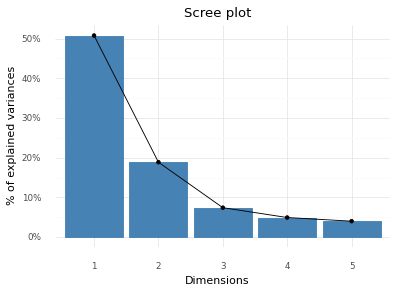

In [4]:
from scientisttools import fviz_screeplot
p = fviz_screeplot(res_pca)
print(p)

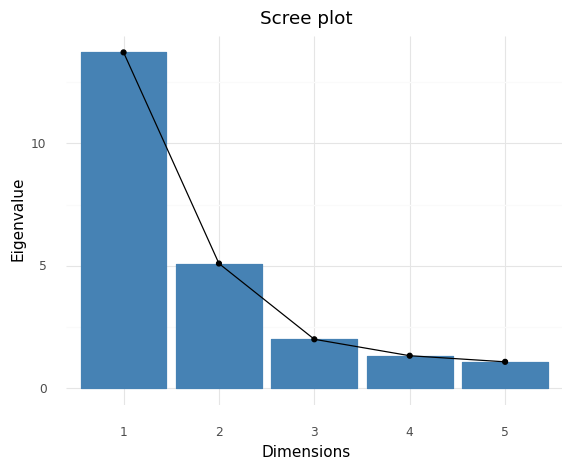

In [5]:
p = fviz_screeplot(res_pca,choice="eigenvalue")
print(p)

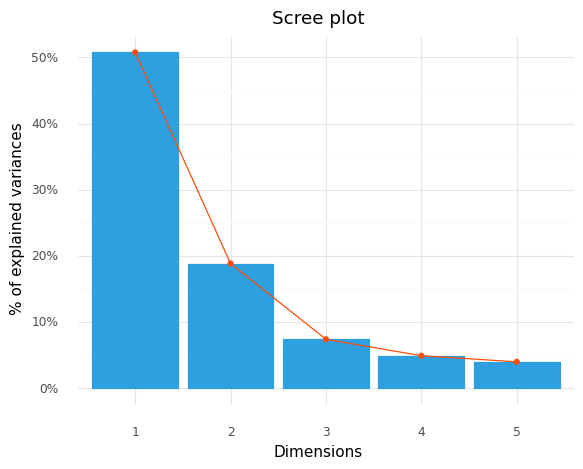

In [6]:
p = fviz_screeplot(res_pca,col_line = "#FC4E07",col_bar = "#2E9FDF", fill_bar= "#2E9FDF")
print(p)

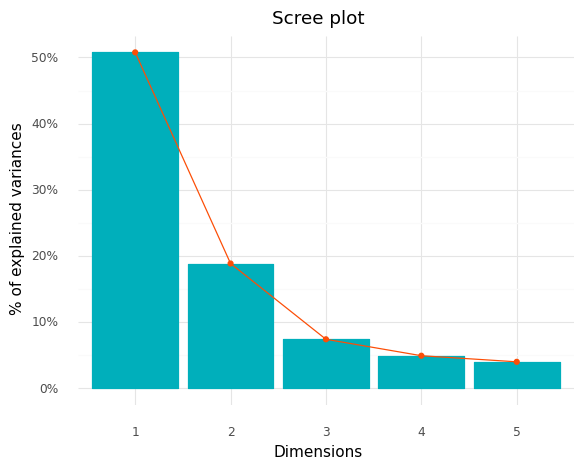

In [7]:
p = fviz_screeplot(res_pca,col_line = "#FC4E07",col_bar = "#00AFBB", fill_bar = "#00AFBB")
print(p)

## Individuals plots

### Color by RGB colors

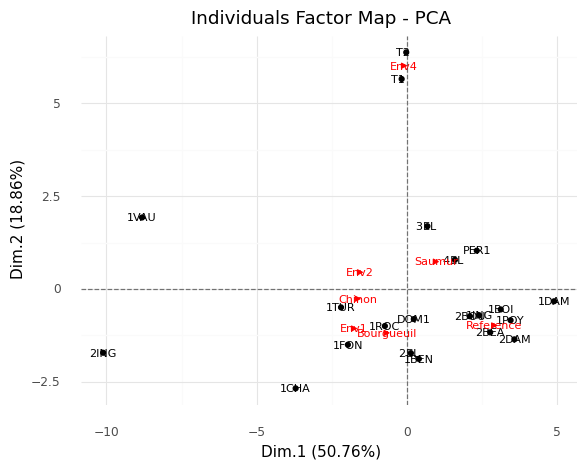

In [8]:
from scientisttools import fviz_pca_ind
p = fviz_pca_ind(res_pca,repel_ind=False)
print(p)

### Color by cos2

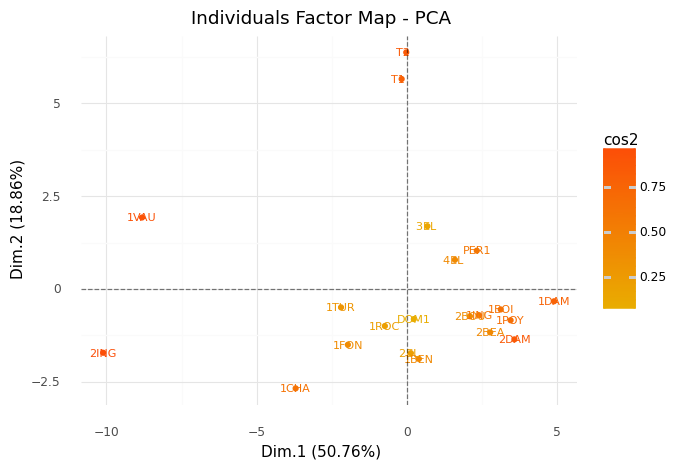

In [9]:
# Color by Cos2
p = fviz_pca_ind(res_pca,col_ind="cos2",quali_sup=False)
print(p)

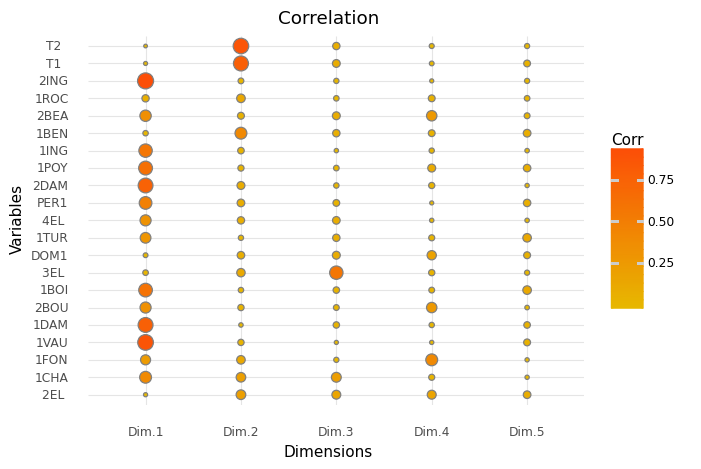

In [10]:
from scientisttools import fviz_corrplot
p = fviz_corrplot(res_pca.ind_.cos2,gradient_cols=["#00AFBB", "#E7B800", "#FC4E07"])
print(p)

### Color by contrib

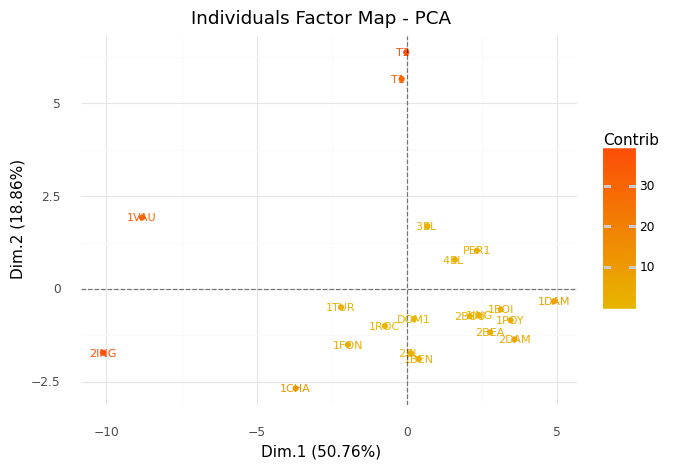

In [11]:
# Color by Cos2
p = fviz_pca_ind(res_pca,col_ind="contrib",quali_sup=False)
print(p)

### Color by continuous variables

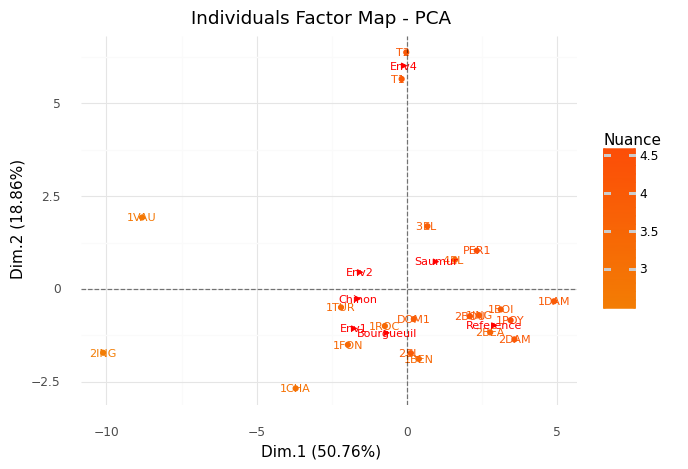

In [12]:
p = fviz_pca_ind(res_pca,col_ind="Nuance")
print(p)

# Color by numpy array

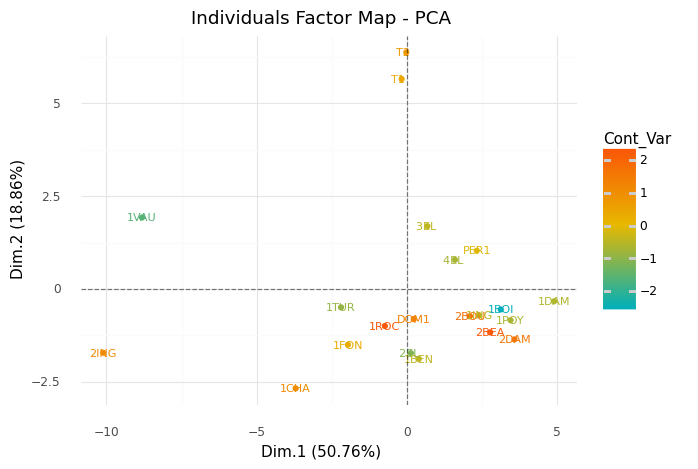

In [13]:
# Using  numpy color
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_pca.ind_.coord.shape[0])
p = fviz_pca_ind(res_pca,col_ind=color_numpy,quali_sup=False)
print(p)

### Color by kmeans

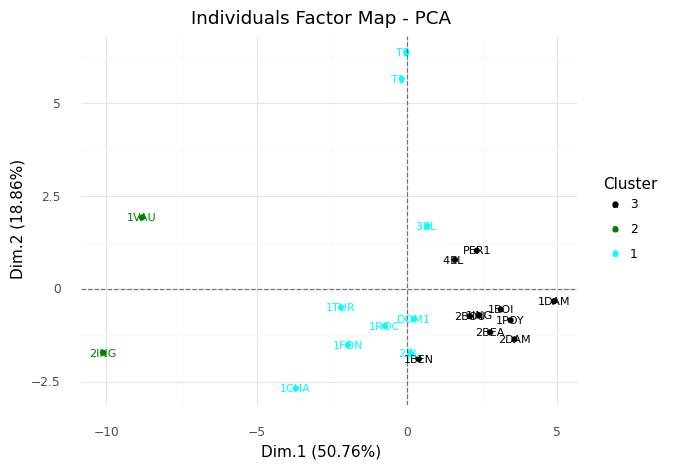

In [14]:
# Using KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_pca.ind_.coord)
p = fviz_pca_ind(res_pca,col_ind=kmeans,repel_ind=False,quali_sup=False)
print(p)

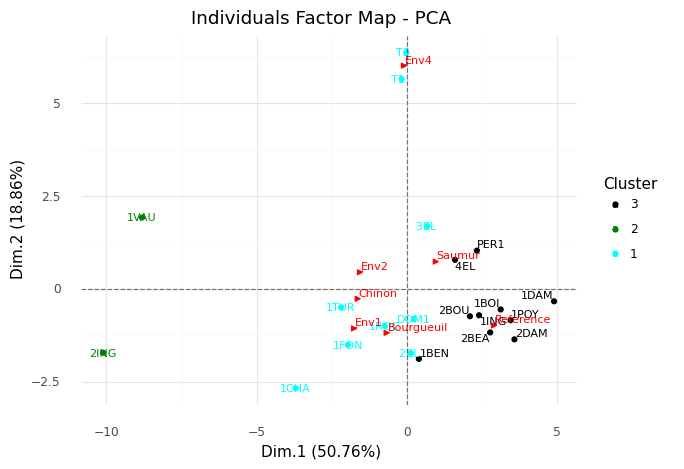

In [15]:
p = fviz_pca_ind(res_pca,col_ind=kmeans,repel_ind=True,quali_sup=True,add_ellipses=True)
print(p)

### Color by qualitatives variables

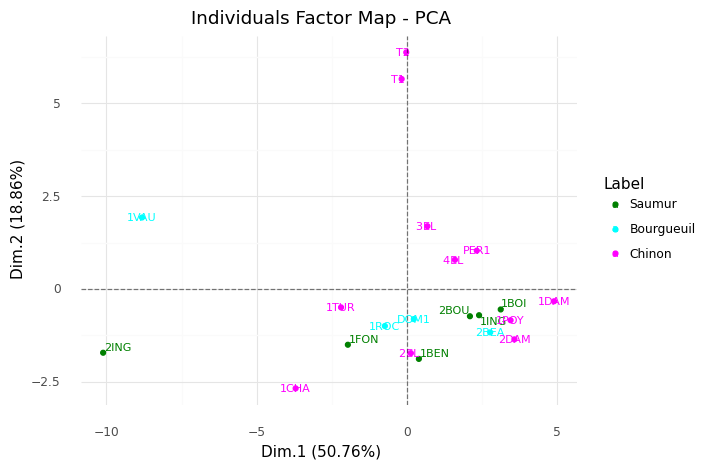

In [16]:
p = fviz_pca_ind(res_pca,quali_sup=False,habillage="Label",repel_ind=True,add_ellipses=False)
print(p)

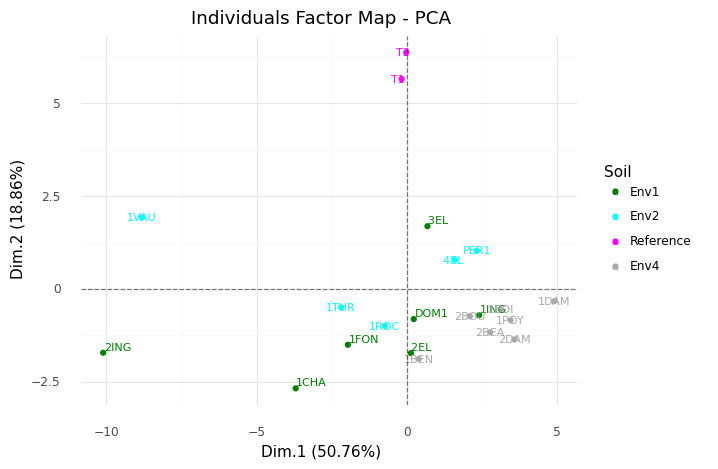

In [17]:
p = fviz_pca_ind(res_pca,quali_sup=False,habillage="Soil",repel_ind=True,add_ellipses=False)
print(p)

### Set limits

#### lim Cos2

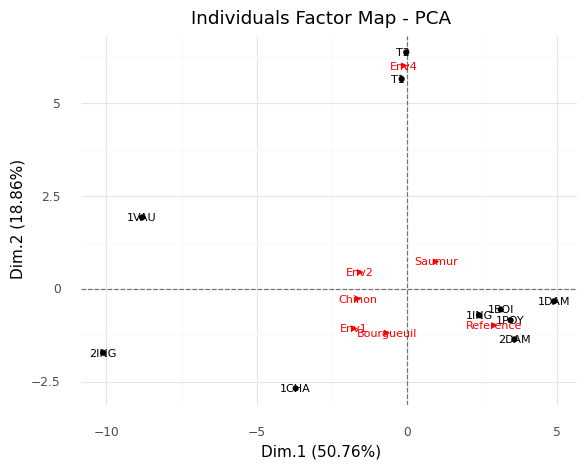

In [18]:
p = fviz_pca_ind(res_pca,repel_ind=False,lim_cos2=0.6)
print(p)

#### lim contrib

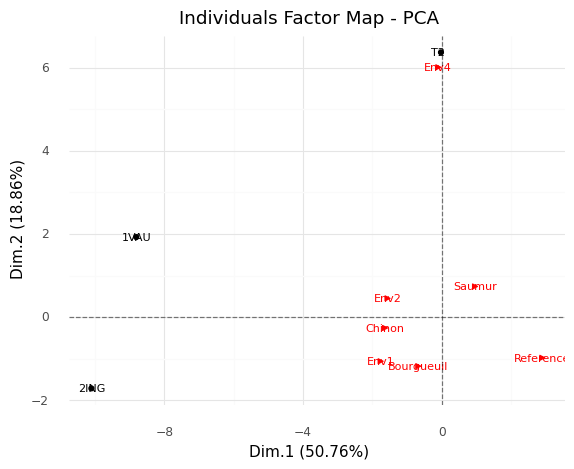

In [19]:
p = fviz_pca_ind(res_pca,repel_ind=False,lim_contrib=30)
print(p)

## Variables

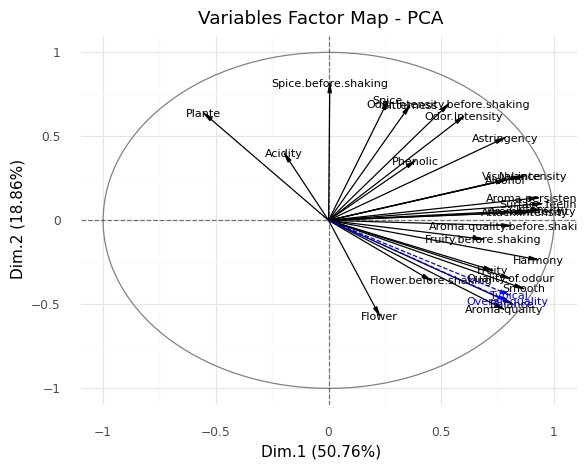

In [20]:
from scientisttools import fviz_pca_var
p = fviz_pca_var(res_pca)
print(p)

## Color by cos2

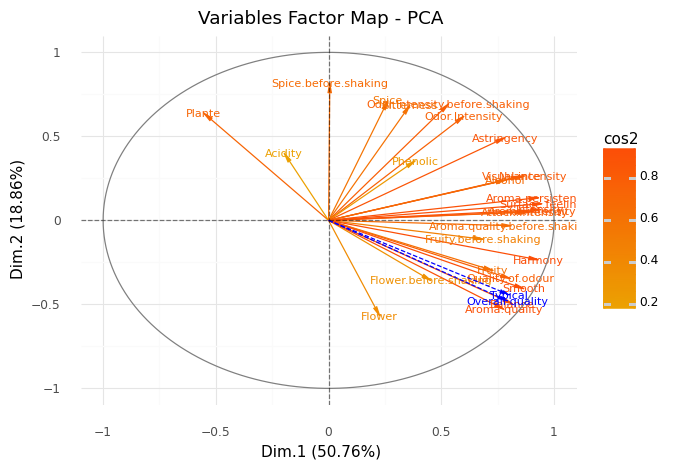

In [21]:
p = fviz_pca_var(res_pca,col_var="cos2")
print(p)

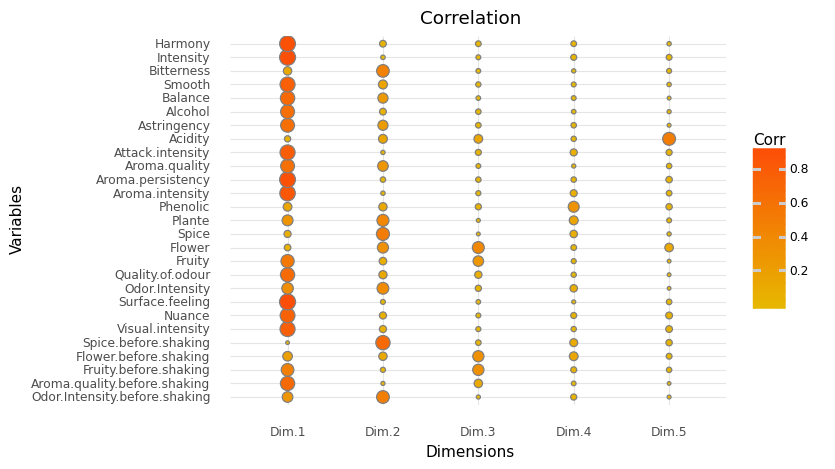

In [22]:
p = fviz_corrplot(res_pca.var_.cos2,gradient_cols=["#00AFBB", "#E7B800", "#FC4E07"])
print(p)

### Color by contrib

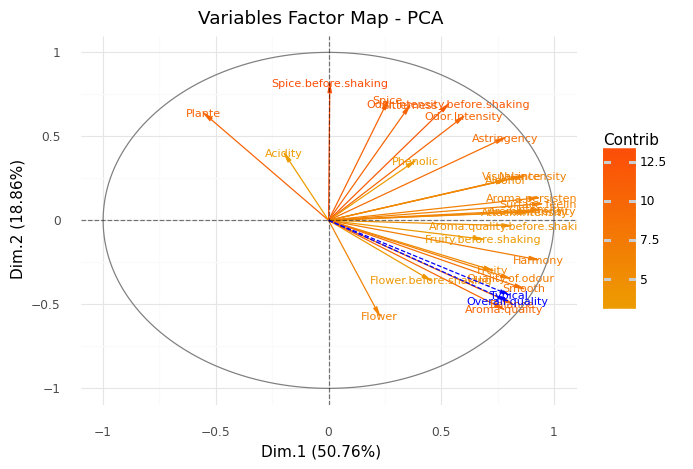

In [23]:
p = fviz_pca_var(res_pca,col_var="contrib")
print(p)

#### Color by numpy array

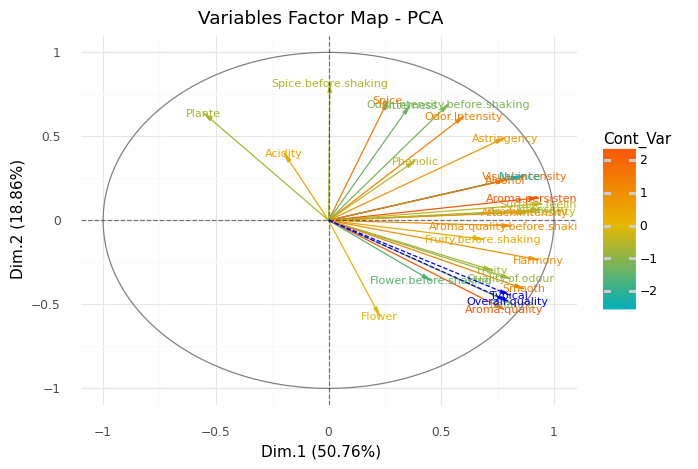

In [24]:
np.random.seed(123)
color_numpy = np.random.normal(size=res_pca.call_.X.shape[1])
p = fviz_pca_var(res_pca,col_var=color_numpy)
print(p) 

### Colobr by kmeans

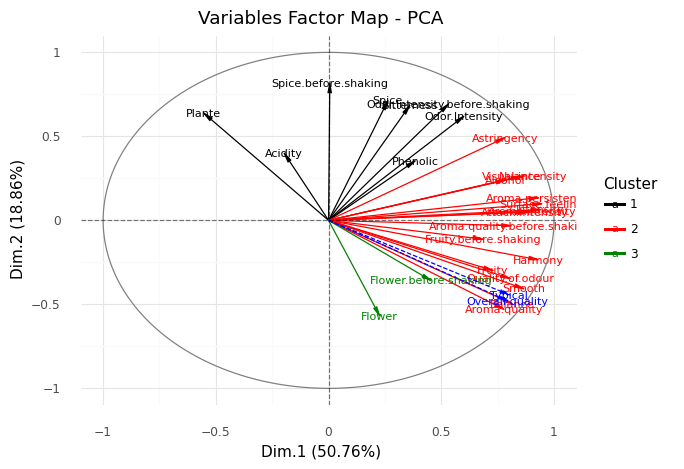

In [25]:
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_pca.var_.coord)
p = fviz_pca_var(res_pca,col_var=kmeans)
print(p)

### Set limits

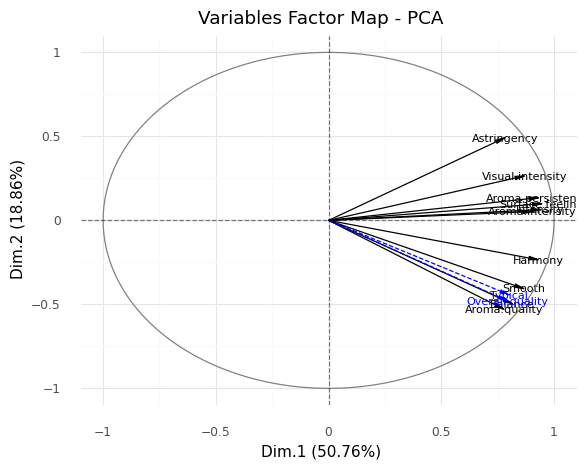

In [26]:
p = fviz_pca_var(res_pca,lim_cos2=0.8)
print(p) 

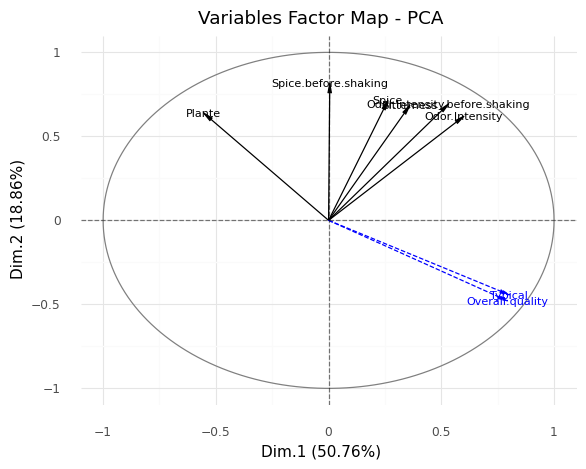

In [27]:
p = fviz_pca_var(res_pca,lim_contrib=10)
print(p) 

## fviz_contrib

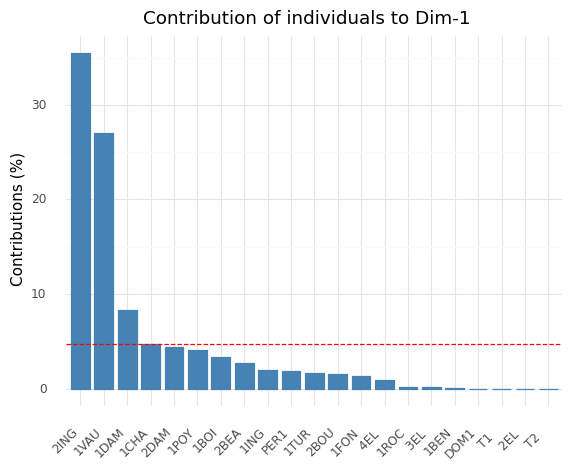

In [28]:
from scientisttools import fviz_contrib
p = fviz_contrib(res_pca,choice="ind")
print(p)

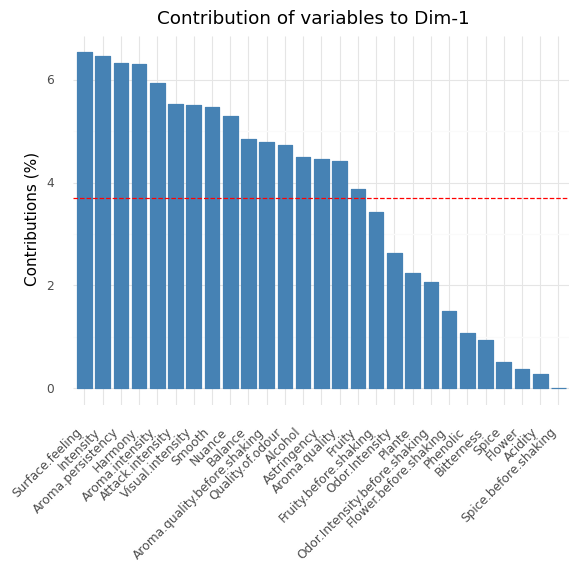

In [29]:
p = fviz_contrib(res_pca,choice="var")
print(p)

## Plot cos2

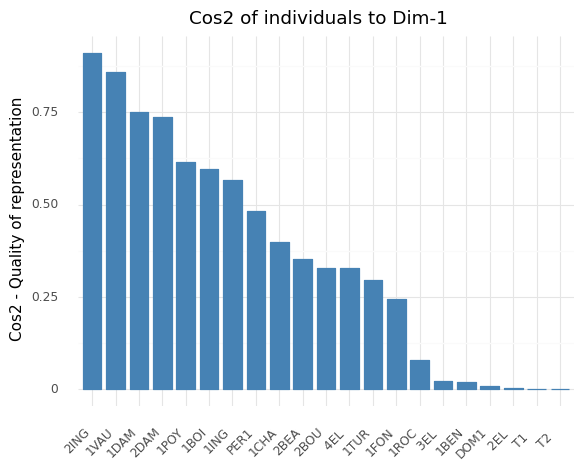

In [30]:
from scientisttools import fviz_cos2
p = fviz_cos2(res_pca)
print(p)

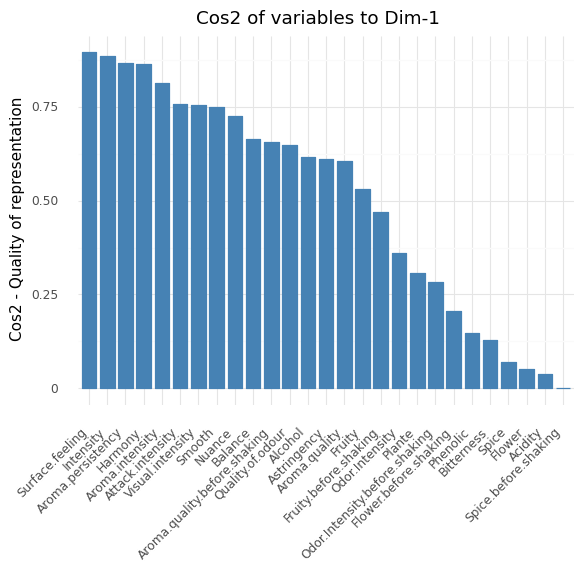

In [31]:
p = fviz_cos2(res_pca,choice="var")
print(p)

## Corrcircle

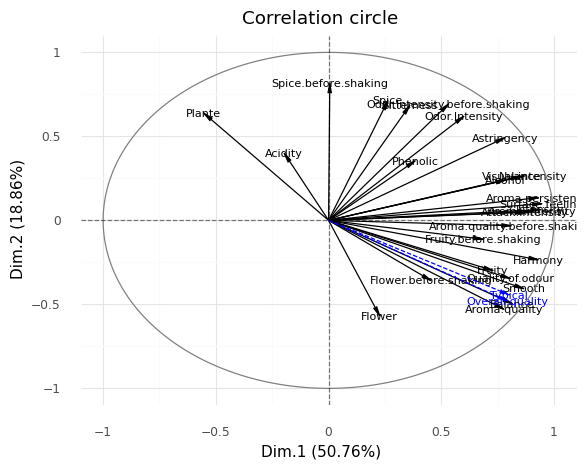

In [32]:
from scientisttools import fviz_corrcircle
p = fviz_corrcircle(res_pca)
print(p)

## biplot

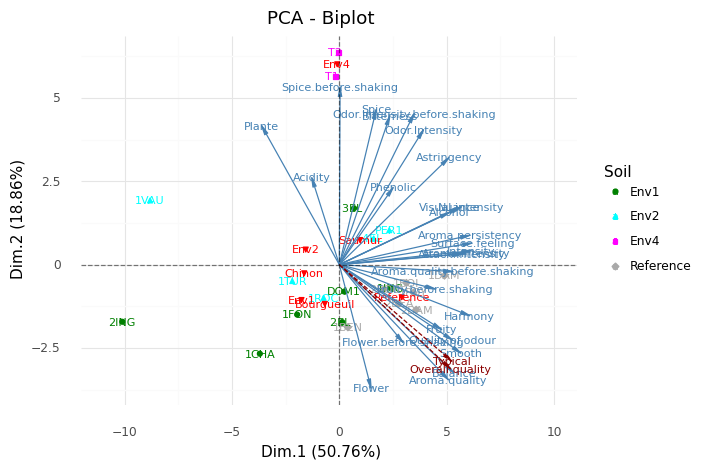

In [33]:
from scientisttools import fviz_pca_biplot
p = fviz_pca_biplot(res_pca,habillage="Soil",add_ellipses=False,x_lim=(-11,10))
print(p)